In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
sns.set_style('darkgrid')

In [5]:
xtrain= pd.read_csv('C:/Users/nishant/ML Practice/Diabetes classification/Training Data/Diabetes_XTrain.csv')
ytrain= pd.read_csv('C:/Users/nishant/ML Practice/Diabetes classification/Training Data/Diabetes_YTrain.csv')

In [6]:
xtrain.shape

(576, 8)

In [7]:
ytrain.shape

(576, 1)

In [8]:
xtest = pd.read_csv('C:/Users/nishant/ML Practice/Diabetes classification/Test Cases/Diabetes_Xtest.csv')

In [9]:
xtest.shape

(192, 8)

In [10]:
sample = pd.read_csv('C:/Users/nishant/ML Practice/Diabetes classification/Test Cases/sample_submission.csv')

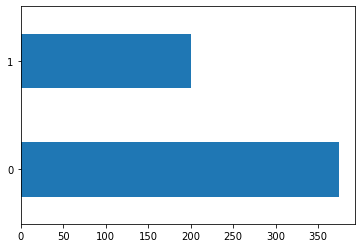

In [11]:
ytrain['Outcome'].value_counts().plot(kind='barh')
plt.show()

C:\Users\nishant\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


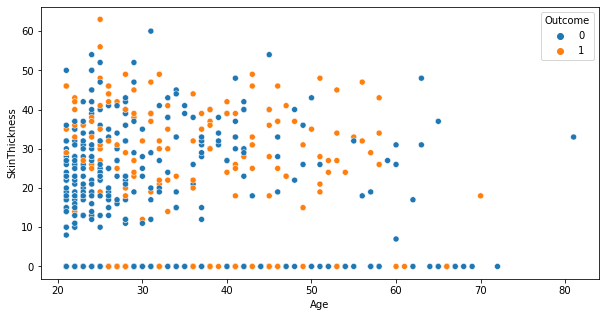

In [12]:
plt.figure(figsize=(10,5))
sns.scatterplot(xtrain['Age'],xtrain['SkinThickness'],hue=ytrain['Outcome'])
plt.show()

In [13]:
xtrain


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,7,168,88,42,321,38.2,0.787,40
1,8,110,76,0,0,27.8,0.237,58
2,7,147,76,0,0,39.4,0.257,43
3,2,100,66,20,90,32.9,0.867,28
4,4,129,86,20,270,35.1,0.231,23
...,...,...,...,...,...,...,...,...
571,2,111,60,0,0,26.2,0.343,23
572,7,187,68,39,304,37.7,0.254,41
573,2,122,60,18,106,29.8,0.717,22
574,4,154,72,29,126,31.3,0.338,37


## KNN

In [14]:
def euclidean_distance(x1,x2):
     return np.sqrt(np.sum((x1-x2)**2))

In [27]:
def predict(x,k,xtrain,ytrain):
    result = []
    
    for i in range(len(xtrain)):
        
        result.append([euclidean_distance(xtrain.iloc[i,:],x),ytrain.iloc[i,0]])
        
    
    
    result = sorted(result)
    result = result[:k]
    result = np.array(result)
    unique, counts = np.unique(result[:,1], return_counts=True)
    result = dict(zip(unique, counts))
    if result.get(0) == None:
        return np.int64(1)
    elif result.get(1) == None :
        return np.int64(0)
    elif result.get(0) > result.get(1):
        return np.int64(0)
     
    
    return np.int64(1)
    
    

## Choosing the value of K


In [18]:
x_train = xtrain[:round(0.8*len(xtrain))] 
y_train = ytrain[:round(0.8*len(xtrain))]
x_val = xtrain[round(0.8*len(xtrain)):]
y_val = ytrain[round(0.8*len(xtrain)):] 

In [19]:
x_train.shape

(461, 8)

In [20]:
y_train.shape

(461, 1)

In [21]:
x_val.shape

(115, 8)

In [22]:
y_val.shape

(115, 1)

In [51]:
k = np.arange(1,40)

In [52]:
x = []
y = []
for i in k:
    x.append(i)
    result = []
    for j in range(len(x_val)):
        result.append(predict(x_val.iloc[j,:],i,x_train,y_train))
    prediction = np.array(result)
    actual = np.array(y_val)
    y.append(metrics.accuracy_score(prediction,actual))

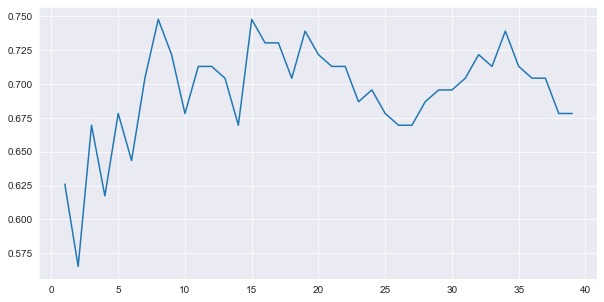

In [53]:
plt.figure(figsize=(10,5))
plt.plot(x,y)
plt.show()

In [56]:
for count,i in enumerate(x):
    print(f"{i}:->{y[count]}")

1:->0.6260869565217392
2:->0.5652173913043478
3:->0.6695652173913044
4:->0.6173913043478261
5:->0.6782608695652174
6:->0.6434782608695652
7:->0.7043478260869566
8:->0.7478260869565218
9:->0.7217391304347827
10:->0.6782608695652174
11:->0.7130434782608696
12:->0.7130434782608696
13:->0.7043478260869566
14:->0.6695652173913044
15:->0.7478260869565218
16:->0.7304347826086957
17:->0.7304347826086957
18:->0.7043478260869566
19:->0.7391304347826086
20:->0.7217391304347827
21:->0.7130434782608696
22:->0.7130434782608696
23:->0.6869565217391305
24:->0.6956521739130435
25:->0.6782608695652174
26:->0.6695652173913044
27:->0.6695652173913044
28:->0.6869565217391305
29:->0.6956521739130435
30:->0.6956521739130435
31:->0.7043478260869566
32:->0.7217391304347827
33:->0.7130434782608696
34:->0.7391304347826086
35:->0.7130434782608696
36:->0.7043478260869566
37:->0.7043478260869566
38:->0.6782608695652174
39:->0.6782608695652174


# Results

In [61]:
result = []
k = 33
for i in range(len(xtest)):
    result.append(predict(xtest.iloc[i,:],k,xtrain,ytrain))
submission = pd.DataFrame(result,columns=['Outcome'])

In [62]:
len(submission)

192

In [63]:
submission.to_csv('submission.csv',index=False)
